# WeatherPy
----
Observations: I knew there was a strong correlation between latitude and max temp in the Northern Hemisphere. I didn't expect the much weaker correlation in the Southern Hemisphere. But...some of that probably has to do with the greater amount of landmass in the Northern Hemisphere. Cold air holds less moisture...so the correlation between humidity and latitude makes sense. 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

# List for city weaather data
city_weather_list = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
citycnt = 0
cityset = 1

# Loop through all the cities in our list
for city in cities:
    
    citycnt += 1
    
    # Create endpoint URL with each city
    query_url = weather_url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'
    
    # Log the url, record, and set numbers
    print(f"Processing city {citycnt} in set {cityset}: {city}")

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url).json()
        

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_weather_list.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Moving along...")
        pass
    
    if citycnt%50 == 0:
        print(f"Regularly scheduled processing delay...")
        time.sleep(60)
        cityset = cityset + 1
        citycnt = 0
        
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing city 1 in set 1: maple creek
Processing city 2 in set 1: itacoatiara
Processing city 3 in set 1: santa rosa
Processing city 4 in set 1: rikitea
Processing city 5 in set 1: poopo
Processing city 6 in set 1: saldanha
Processing city 7 in set 1: whitehorse
Processing city 8 in set 1: victoria
Processing city 9 in set 1: norman wells
Processing city 10 in set 1: srednekolymsk
Processing city 11 in set 1: san patricio
Processing city 12 in set 1: ushuaia
Processing city 13 in set 1: punta arenas
Processing city 14 in set 1: hobart
Processing city 15 in set 1: tasiilaq
Processing city 16 in set 1: bartica
Processing city 17 in set 1: mataura
Processing city 18 in set 1: samalaeulu
City not found. Moving along...
Processing city 19 in set 1: mahebourg
Processing city 20 in set 1: ippy
Processing city 21 in set 1: chokurdakh
Processing city 22 in set 1: pevek
Processing city 23 in set 1: ribeira grande
Processing city 24 in

Processing city 43 in set 4: kanodar
Processing city 44 in set 4: kondoa
Processing city 45 in set 4: jamestown
Processing city 46 in set 4: codrington
Processing city 47 in set 4: betsiamites
Processing city 48 in set 4: saleaula
City not found. Moving along...
Processing city 49 in set 4: coahuayana
Processing city 50 in set 4: nguiu
City not found. Moving along...
Regularly scheduled processing delay...
Processing city 1 in set 5: pangai
Processing city 2 in set 5: yar-sale
Processing city 3 in set 5: poya
Processing city 4 in set 5: bay roberts
Processing city 5 in set 5: khatanga
Processing city 6 in set 5: okha
Processing city 7 in set 5: padampur
Processing city 8 in set 5: lasem
Processing city 9 in set 5: san francisco
Processing city 10 in set 5: hukuntsi
Processing city 11 in set 5: udachnyy
Processing city 12 in set 5: bijar
Processing city 13 in set 5: ostrovnoy
Processing city 14 in set 5: vaitupu
City not found. Moving along...
Processing city 15 in set 5: barrow
Process

Processing city 42 in set 8: sogdiondon
City not found. Moving along...
Processing city 43 in set 8: clyde river
Processing city 44 in set 8: nishihara
Processing city 45 in set 8: samarai
Processing city 46 in set 8: iqaluit
Processing city 47 in set 8: coro
Processing city 48 in set 8: boden
Processing city 49 in set 8: bengkulu
Processing city 50 in set 8: diamantino
Regularly scheduled processing delay...
Processing city 1 in set 9: graaff-reinet
Processing city 2 in set 9: tarashcha
Processing city 3 in set 9: aksu
Processing city 4 in set 9: sioux lookout
Processing city 5 in set 9: tautira
Processing city 6 in set 9: demerval lobao
Processing city 7 in set 9: lolua
City not found. Moving along...
Processing city 8 in set 9: healdsburg
Processing city 9 in set 9: mweka
Processing city 10 in set 9: minab
Processing city 11 in set 9: tovuz
Processing city 12 in set 9: puerto colombia
Processing city 13 in set 9: veriora
Processing city 14 in set 9: tumannyy
City not found. Moving a

Processing city 41 in set 12: waipawa
Processing city 42 in set 12: pionerskiy
Processing city 43 in set 12: alegrete
Processing city 44 in set 12: chapais
Processing city 45 in set 12: acopiara
Processing city 46 in set 12: channel-port aux basques
Processing city 47 in set 12: panuco
Processing city 48 in set 12: oistins
Processing city 49 in set 12: saint joseph
Processing city 50 in set 12: bonavista
Regularly scheduled processing delay...
Processing city 1 in set 13: mogadishu
Processing city 2 in set 13: lesogorsk
Processing city 3 in set 13: saint-joseph
Processing city 4 in set 13: hemsedal
Processing city 5 in set 13: olafsvik
Processing city 6 in set 13: espelkamp
Processing city 7 in set 13: inirida
Processing city 8 in set 13: isfana
Processing city 9 in set 13: varzea da palma
Processing city 10 in set 13: shelburne
Processing city 11 in set 13: hit
Processing city 12 in set 13: kawana waters
City not found. Moving along...
Processing city 13 in set 13: raton
Processing ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# fieldnames = sorted(fieldnames)  
infokeys = ["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]
  
a_file = open(output_data_file, "w", newline='')
dict_writer = csv.DictWriter(a_file,infokeys)
dict_writer.writeheader()
dict_writer.writerows(city_weather_list)
a_file.close()


In [5]:
weather_data = "../output_data/cities.csv"
weatherdf = pd.read_csv(weather_data)
weatherdf.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,maple creek,49.9168,-109.4848,-2.15,71,100,9.22,CA,1643743772
1,itacoatiara,-3.1431,-58.4442,85.15,68,91,4.56,BR,1643743772
2,santa rosa,14.3122,121.1114,76.86,75,25,10.18,PH,1643743188
3,rikitea,-23.1203,-134.9692,78.04,70,100,7.25,PF,1643743772
4,poopo,-18.3667,-66.9667,54.37,59,62,4.54,BO,1643743773


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weatherdf.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,5.920000e+02
mean,20.398545,18.090881,49.926622,72.628378,58.165541,8.318885,1.643744e+09
std,33.635151,91.344583,32.901950,20.482184,40.652000,6.031875,2.804893e+02
min,-54.800000,-179.166700,-36.450000,7.000000,0.000000,0.000000,1.643743e+09
25%,-7.953275,-64.338225,27.975000,62.000000,16.000000,3.790000,1.643744e+09
50%,25.391450,21.952350,60.940000,77.000000,75.000000,6.910000,1.643744e+09
75%,49.504600,100.409250,77.040000,88.000000,100.000000,11.500000,1.643744e+09
max,78.218600,179.316700,98.820000,100.000000,100.000000,37.980000,1.643745e+09


In [ ]:
#  Get the indices of cities that have humidity over 100%.

# 100 is the max value in the humidity column


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

humiditydf = weatherdf['Humidity']

qs = humiditydf.quantile([.25,.5,.75])
lower = qs[.25]
upper = qs[.75]
interquartile = upper-lower
lowerbnd = lower - (1.5*interquartile)
upperbnd = upper + (1.5*interquartile)

clean_city_data = weatherdf.drop(weatherdf.index[(weatherdf['Humidity'] < lowerbnd) | (weatherdf['Humidity'] > upperbnd)])
#clean_weather_data.describe()


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

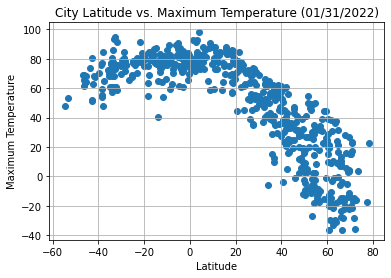

<Figure size 432x288 with 0 Axes>

In [8]:
x_values = clean_city_data['Lat']

y_values = clean_city_data['Max Temp']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('City Latitude vs. Maximum Temperature (01/31/2022)')
plt.grid()
plt.show()
plt.savefig("../output_data/lattemp.png")

## Latitude vs. Humidity Plot

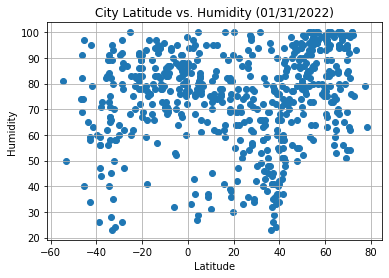

<Figure size 432x288 with 0 Axes>

In [9]:
x_values = clean_city_data['Lat']

y_values = clean_city_data['Humidity']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (01/31/2022)')
plt.grid()
plt.show()
plt.savefig("../output_data/lathumid.png")

## Latitude vs. Cloudiness Plot

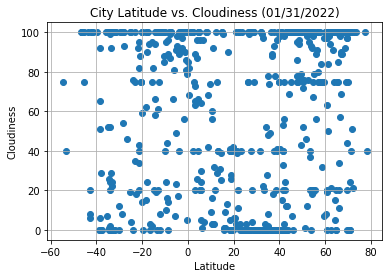

<Figure size 432x288 with 0 Axes>

In [10]:
x_values = clean_city_data['Lat']

y_values = clean_city_data['Cloudiness']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (01/31/2022)')
plt.grid()
plt.show()
plt.savefig("../output_data/latclouds.png")

## Latitude vs. Wind Speed Plot

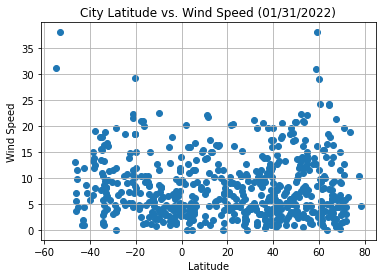

<Figure size 432x288 with 0 Axes>

In [11]:
x_values = clean_city_data['Lat']

y_values = clean_city_data['Wind Speed']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (01/31/2022)')
plt.grid()
plt.show()
plt.savefig("../output_data/latwind.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

-0.8612644037656342


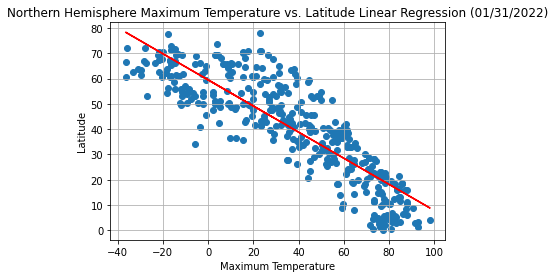

<Figure size 432x288 with 0 Axes>

In [12]:
#plottemp = clean_city_data['Max Temp']

North_Hem = clean_city_data.drop(clean_city_data.index[clean_city_data['Lat']<0])

x_values = North_Hem['Max Temp']
y_values = North_Hem['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere Maximum Temperature vs. Latitude Linear Regression (01/31/2022)")
print(rvalue)
plt.grid()
plt.show()
plt.savefig("../output_data/nhtemplat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0.3925105726613722


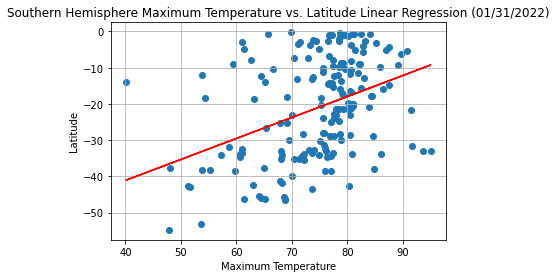

<Figure size 432x288 with 0 Axes>

In [13]:
South_Hem = clean_city_data.drop(clean_city_data.index[clean_city_data['Lat']>0])

x_values = South_Hem['Max Temp']
y_values = South_Hem['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere Maximum Temperature vs. Latitude Linear Regression (01/31/2022)")
print(rvalue)
plt.grid()
plt.show()
plt.savefig("../output_data/shtemplat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.29481986186970566


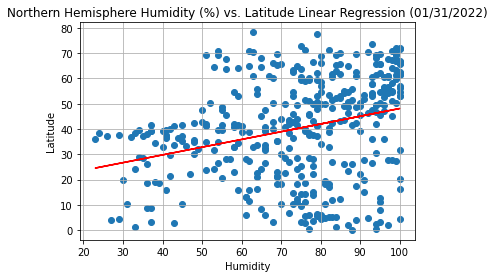

<Figure size 432x288 with 0 Axes>

In [14]:
x_values = North_Hem['Humidity']
y_values = North_Hem['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere Humidity (%) vs. Latitude Linear Regression (01/31/2022)")
print(rvalue)
plt.grid()
plt.show()
plt.savefig("../output_data/nhhumidlat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.32034995426035473


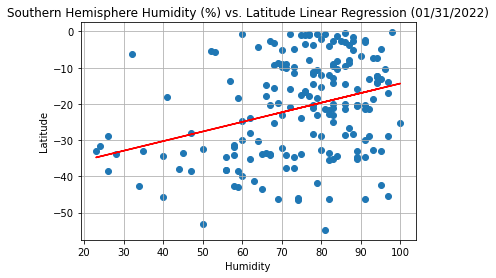

<Figure size 432x288 with 0 Axes>

In [15]:
x_values = South_Hem['Humidity']
y_values = South_Hem['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere Humidity (%) vs. Latitude Linear Regression (01/31/2022)")
print(rvalue)
plt.grid()
plt.show()
plt.savefig("../output_data/shhumidlat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.24657324013203882


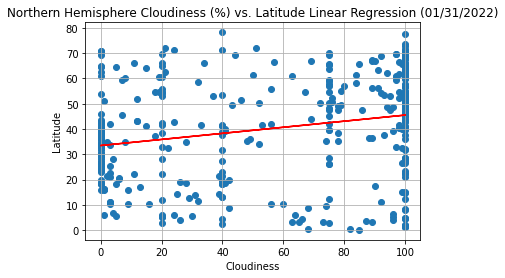

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = North_Hem['Cloudiness']
y_values = North_Hem['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere Cloudiness (%) vs. Latitude Linear Regression (01/31/2022)")
print(rvalue)
plt.grid()
plt.show()
plt.savefig("../output_data/nhcloudlat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.14178622627595766


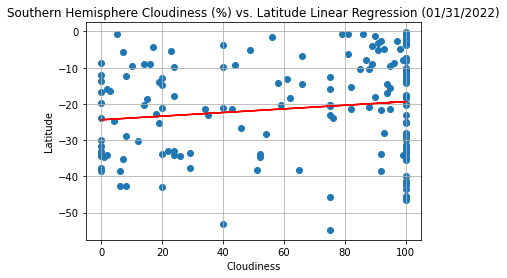

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = South_Hem['Cloudiness']
y_values = South_Hem['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere Cloudiness (%) vs. Latitude Linear Regression (01/31/2022)")
print(rvalue)
plt.grid()
plt.show()
plt.savefig("../output_data/shcloudlat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.04358476363550159


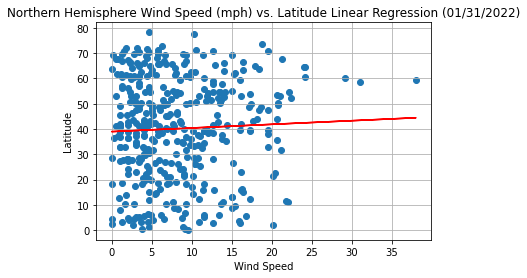

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = North_Hem['Wind Speed']
y_values = North_Hem['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere Wind Speed (mph) vs. Latitude Linear Regression (01/31/2022)")
print(rvalue)
plt.grid()
plt.show()
plt.savefig("../output_data/nhwindlat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.26593875532956207


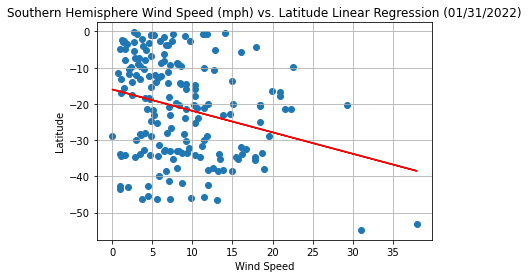

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = South_Hem['Wind Speed']
y_values = South_Hem['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere Wind Speed (mph) vs. Latitude Linear Regression (01/31/2022)")
print(rvalue)
plt.grid()
plt.show()

plt.savefig("../output_data/shwindlat.png")